In [2]:
import pymania as mn
import pylab as plt
from collections import Counter
import pickle as pk

In [3]:
a = mn.ST(126426,'L20','L120')
a.load_roi_regressors()
subs = [126426, 137431, 144125, 146735, 152427, 153227, 177140, 180533, 186545, 188145]

In [5]:
with open('train10.pk','rb') as f:
    C = pk.load(f)

In [6]:
C

[('L114', 'L75'),
 ('L119', 'L155'),
 ('L47', 'L100'),
 ('L125', 'L1'),
 ('L156', 'L16'),
 ('L31', 'L110'),
 ('L82', 'L167'),
 ('L44', 'L87'),
 ('L49', 'L26'),
 ('L53', 'L47')]

0 ('L114', 'L75')


/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1 ('L119', 'L155')
2 ('L47', 'L100')
3 ('L125', 'L1')
4 ('L156', 'L16')
5 ('L31', 'L110')
6 ('L82', 'L167')
7 ('L44', 'L87')
8 ('L49', 'L26')
9 ('L53', 'L47')


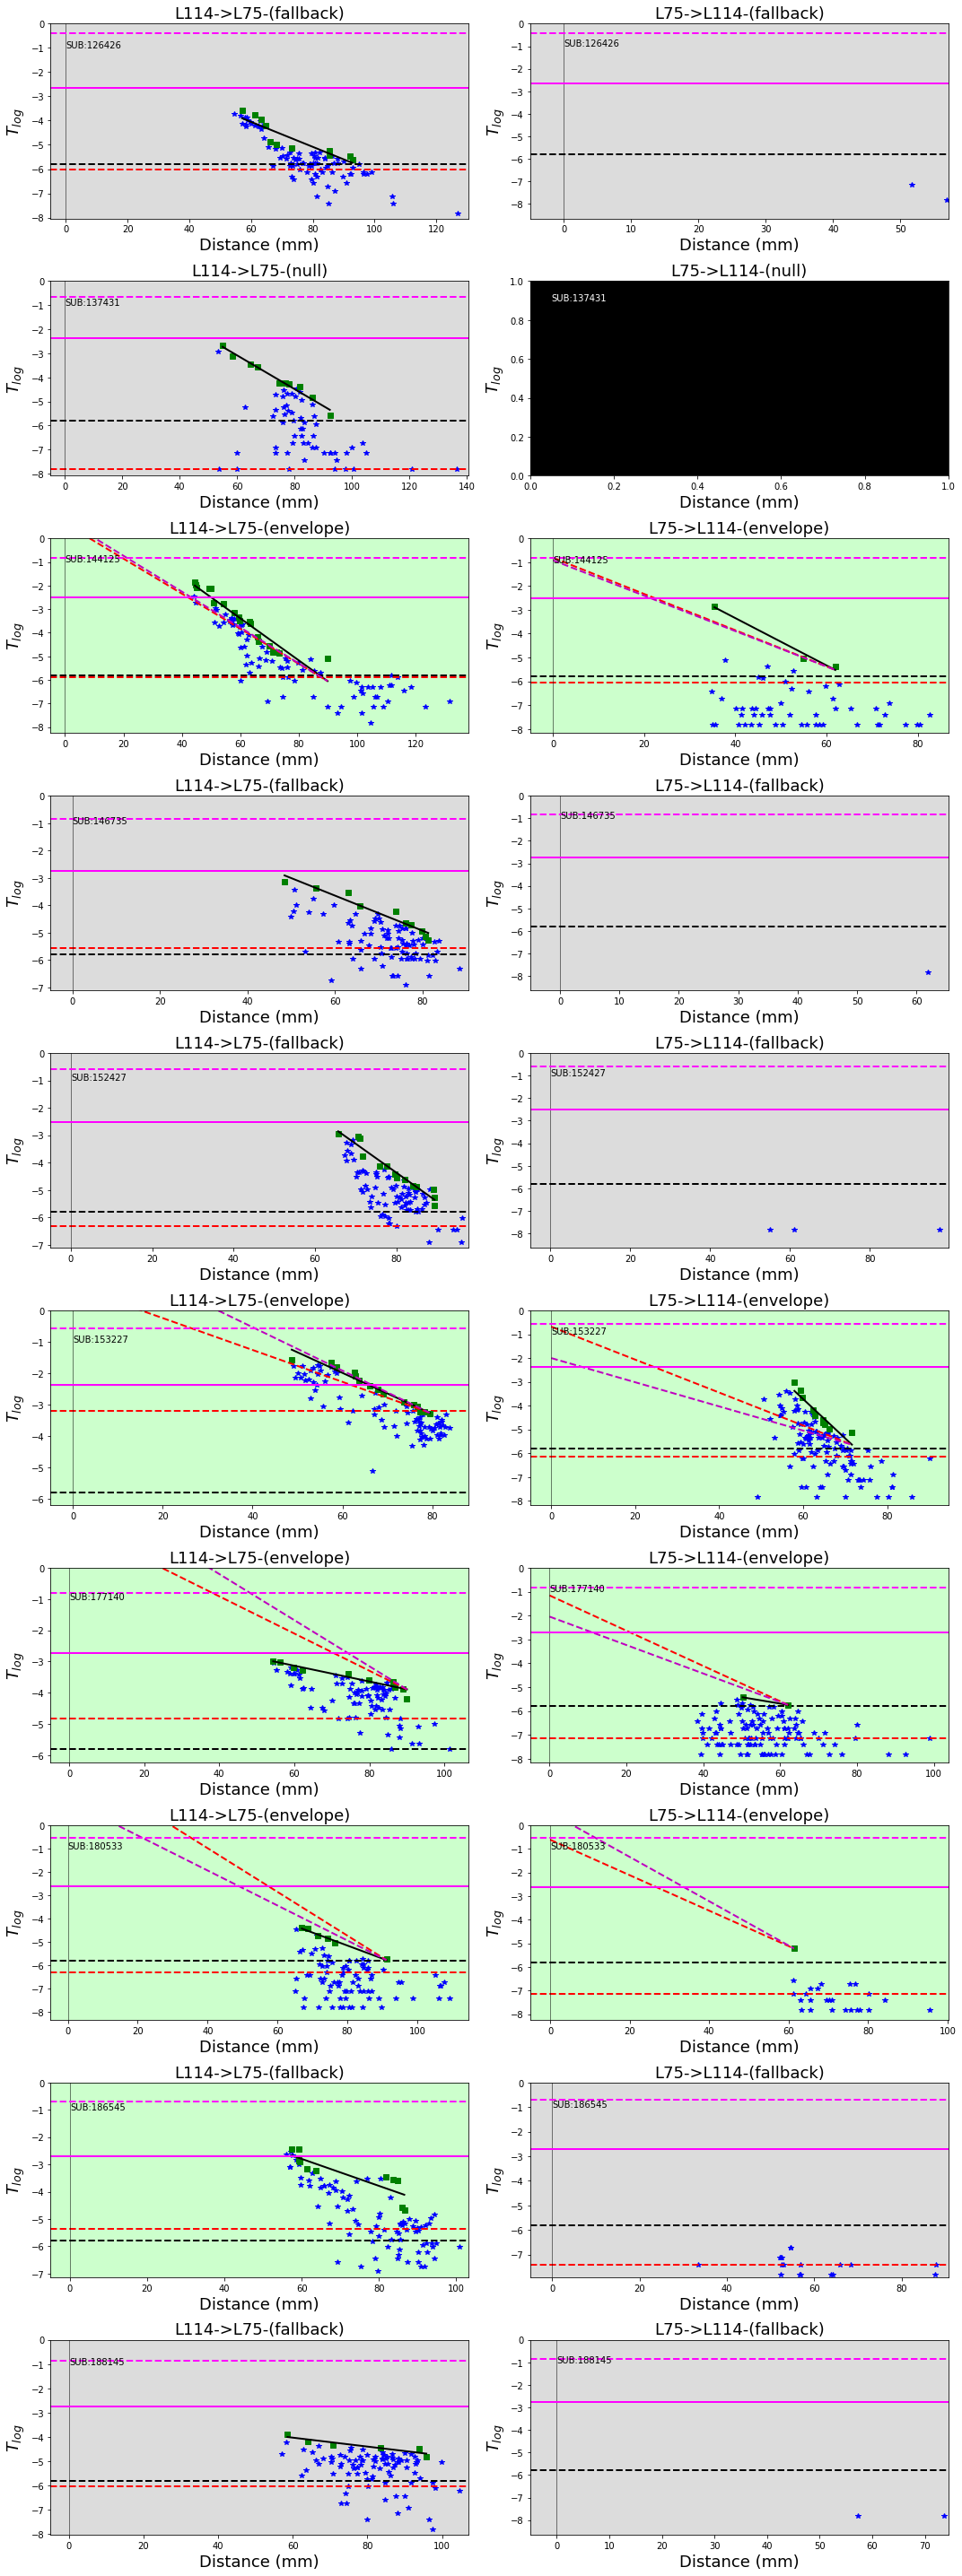

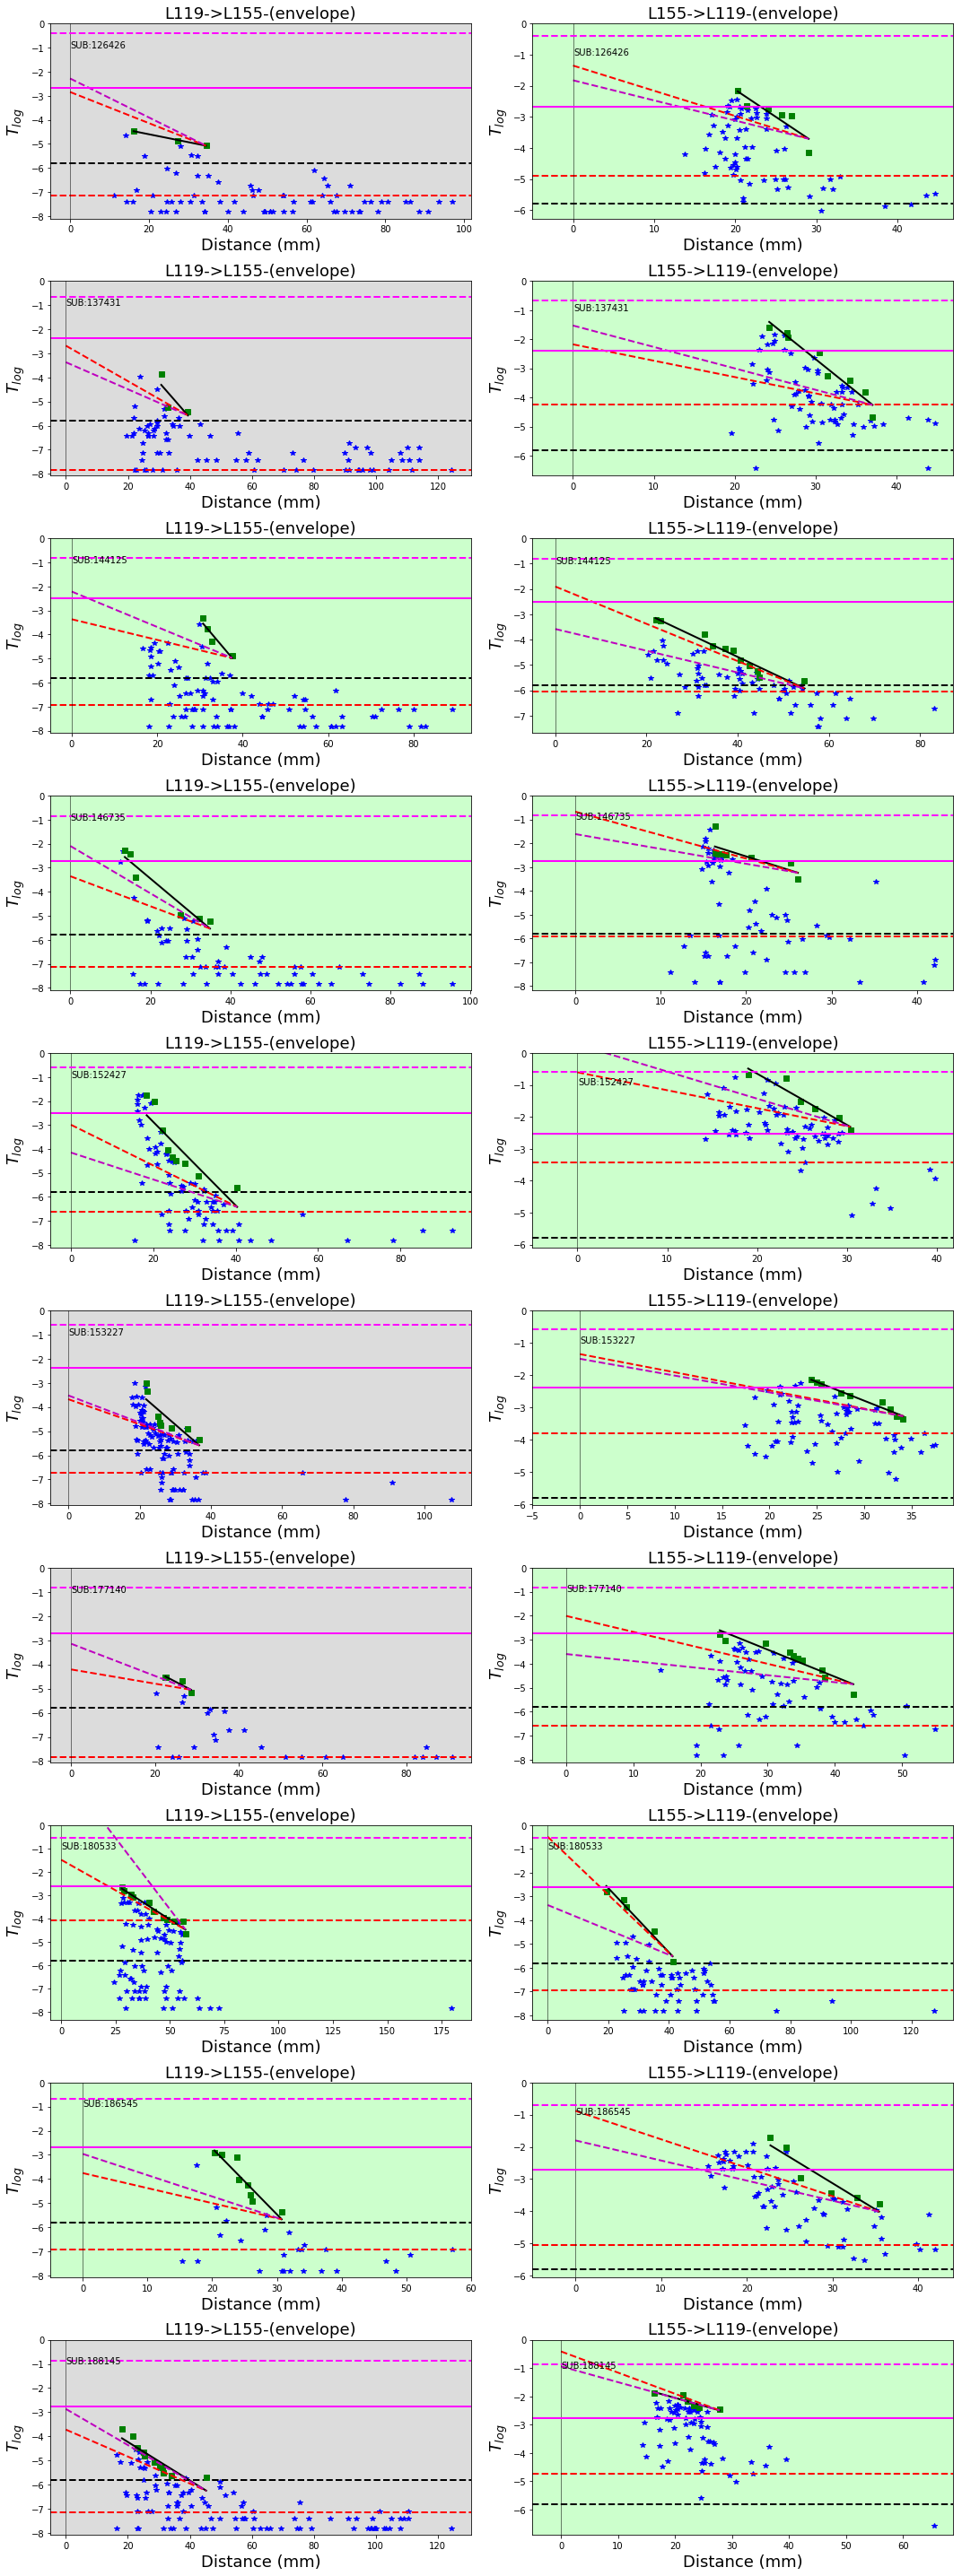

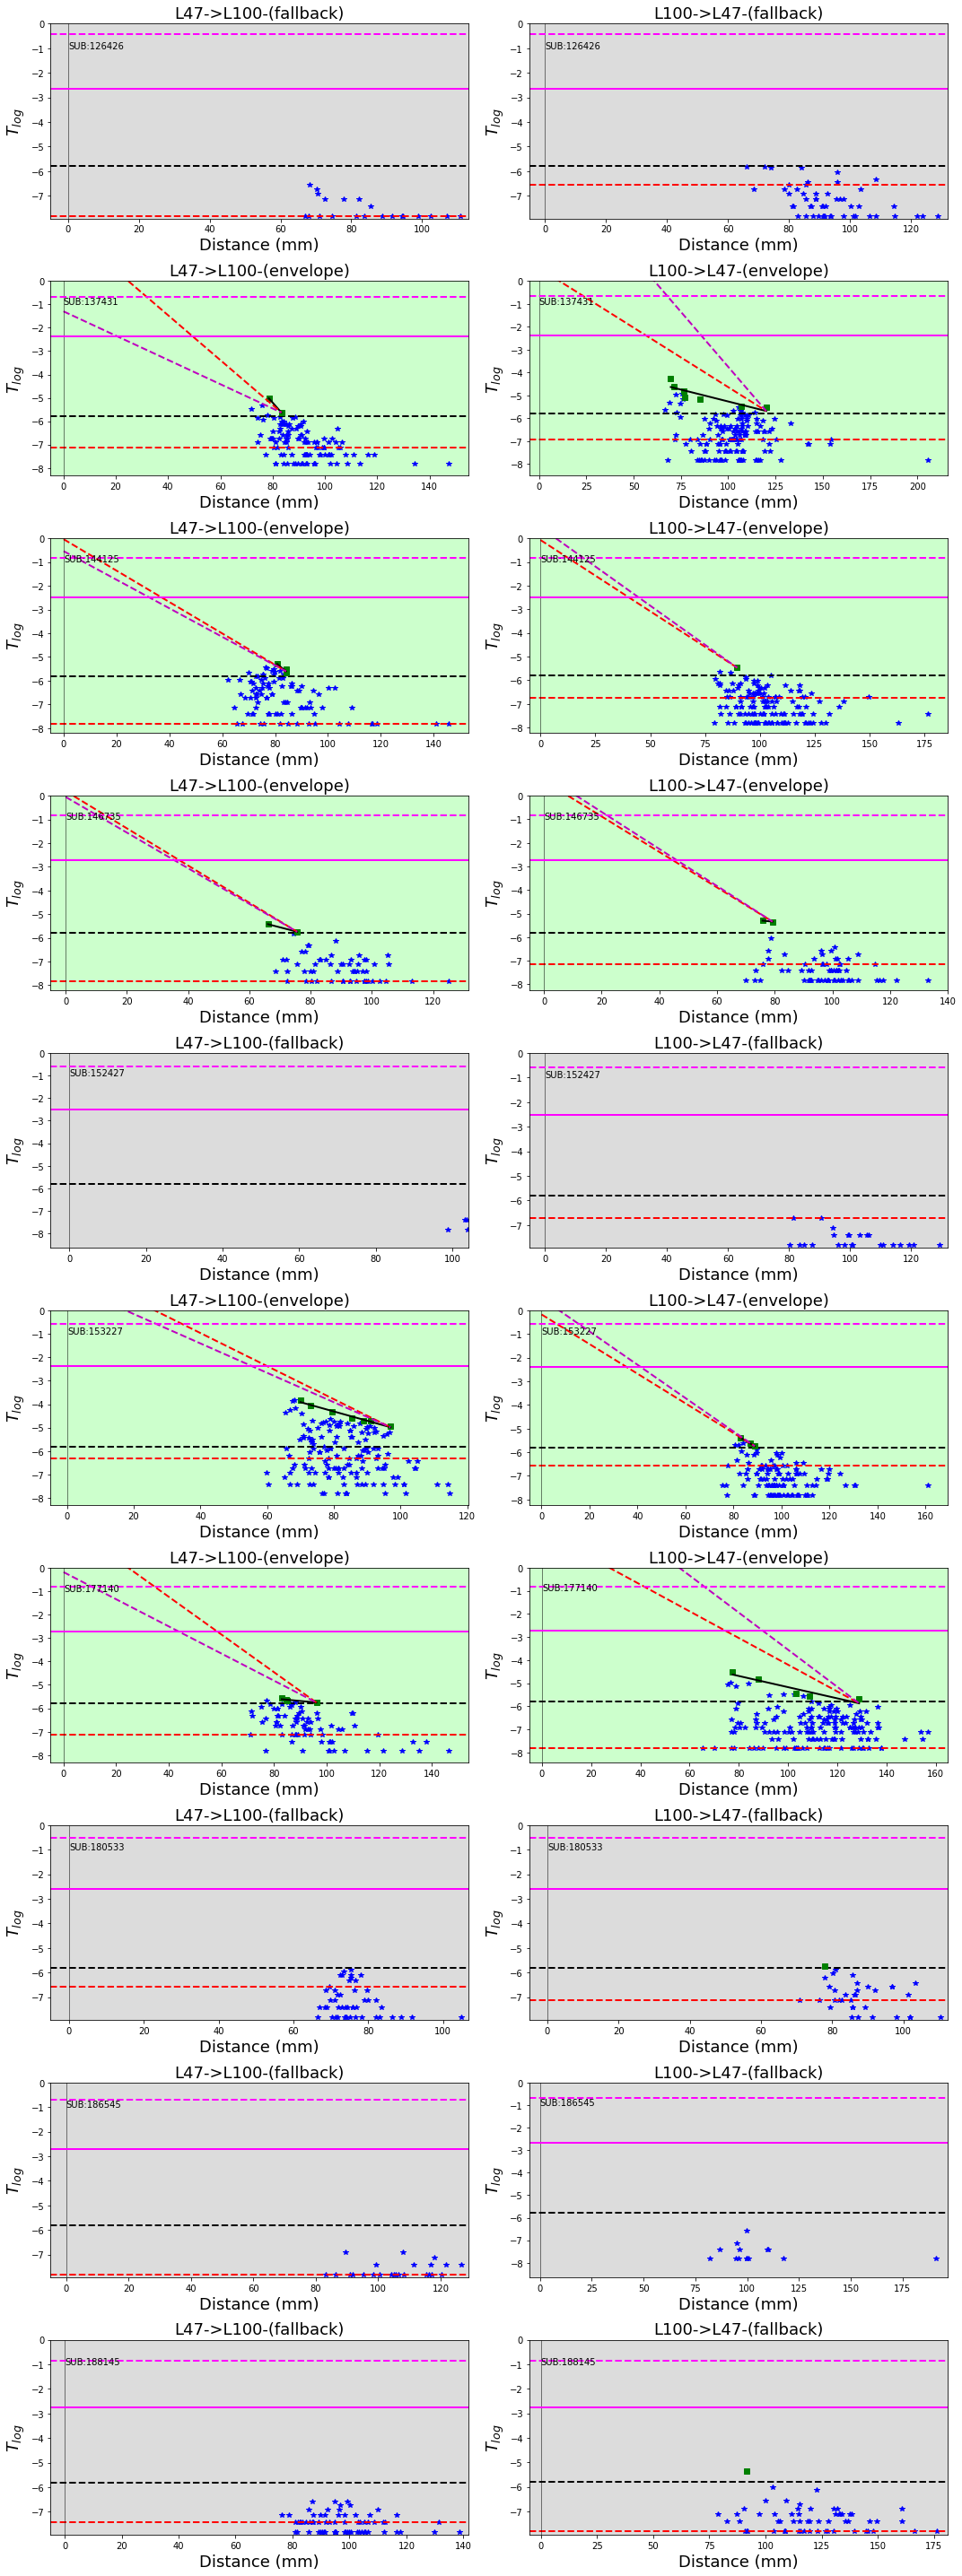

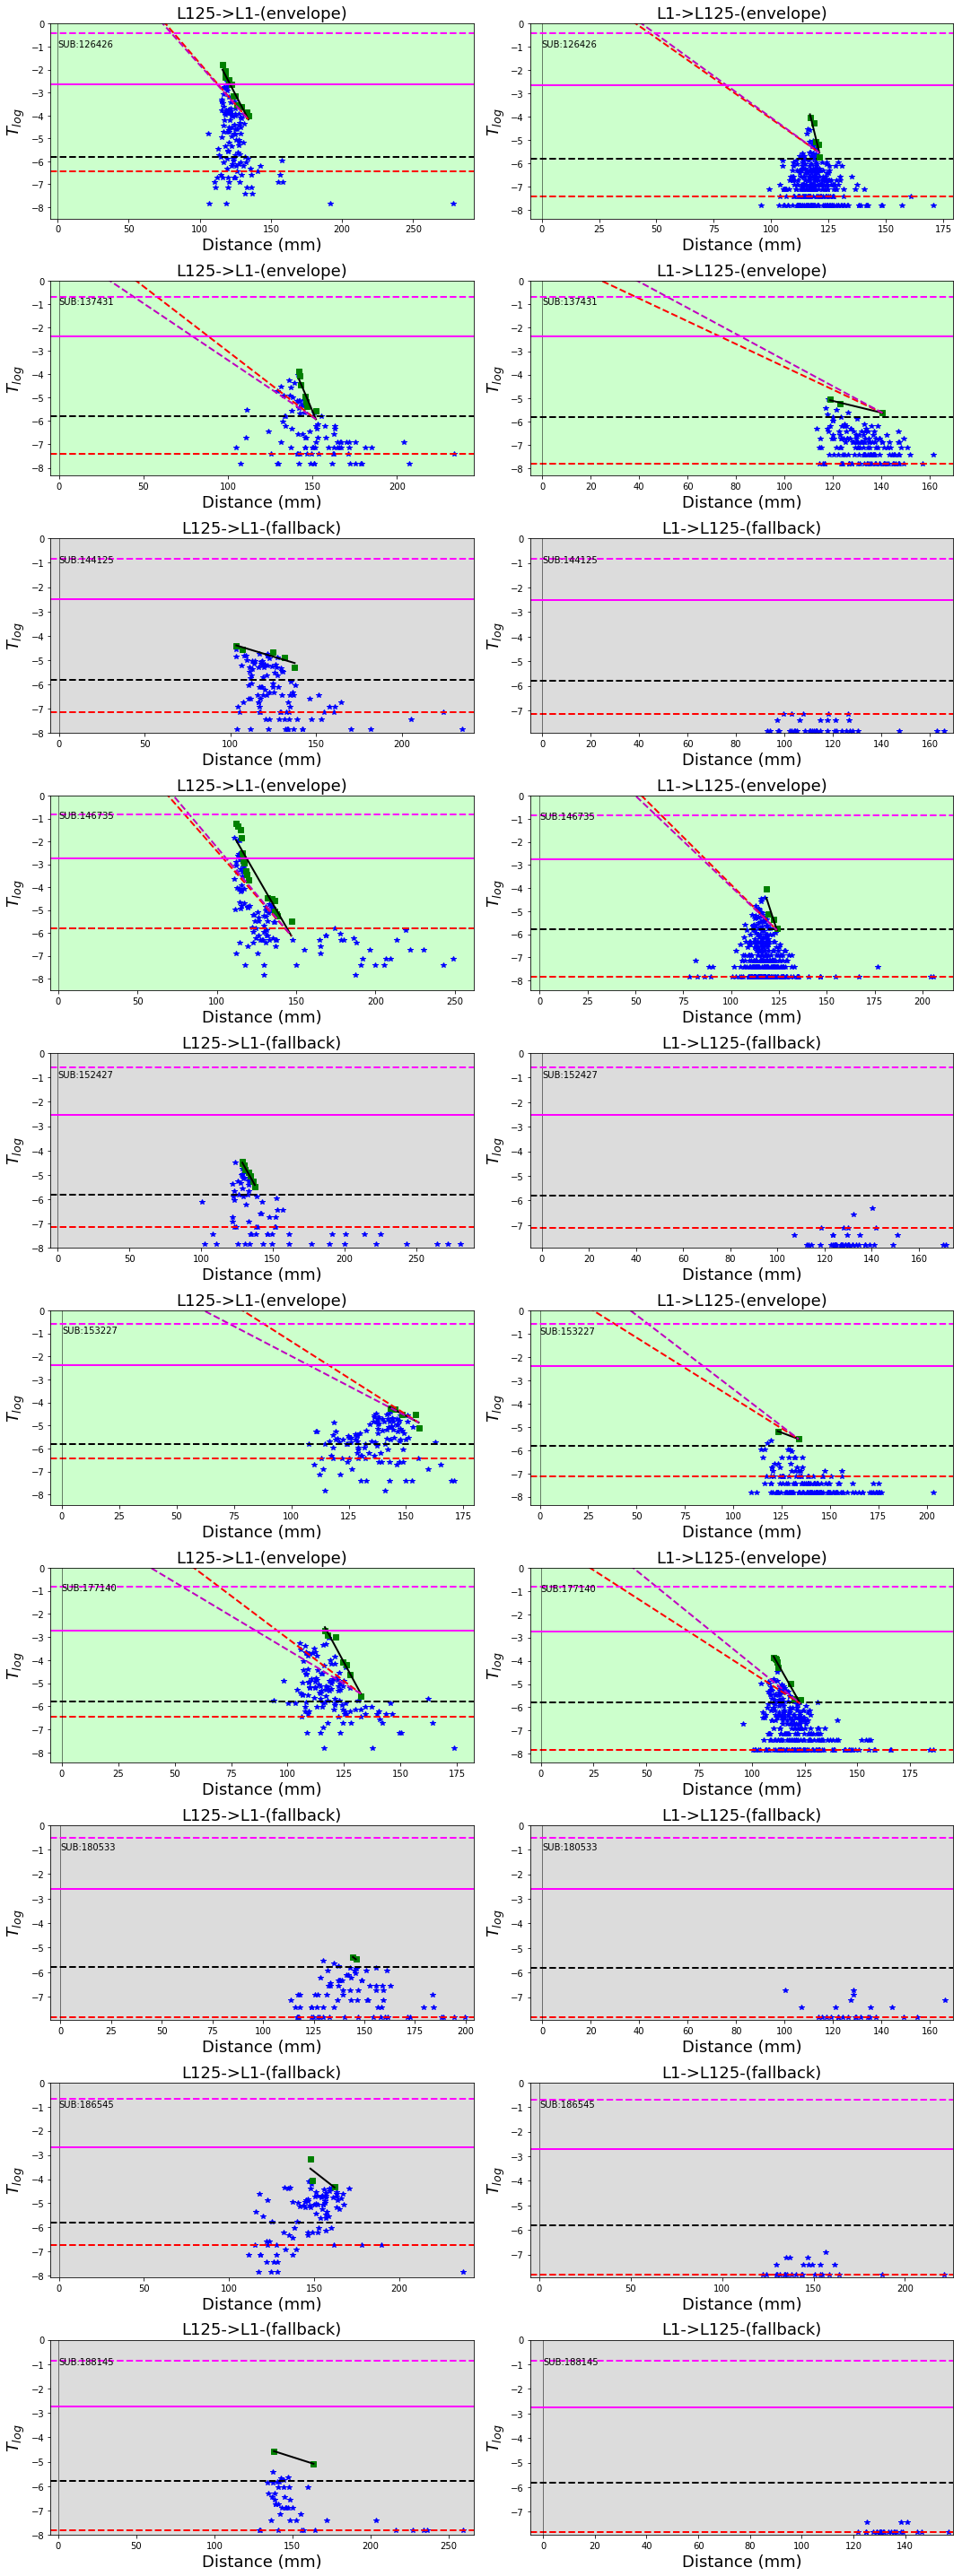

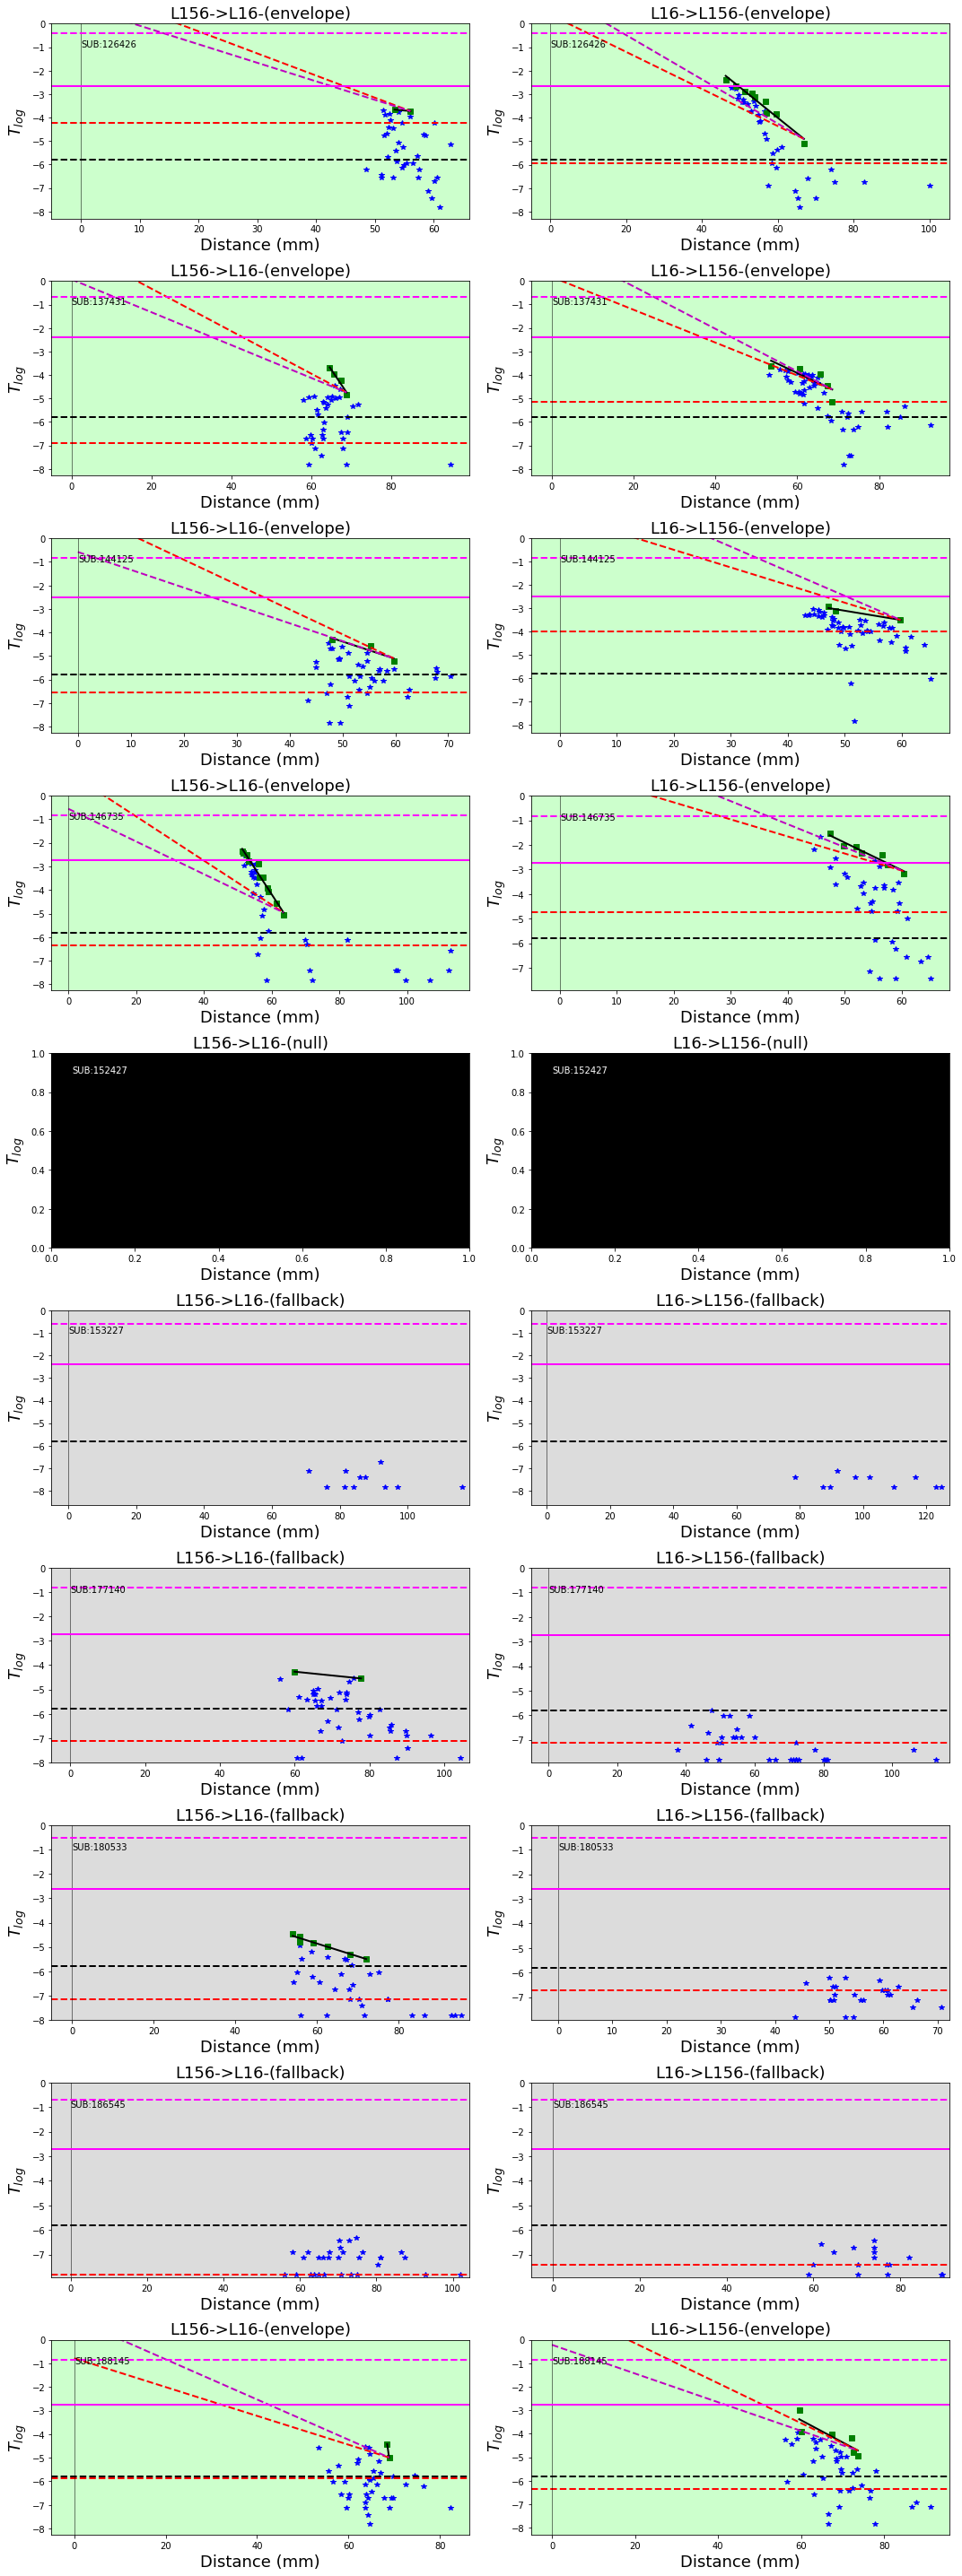

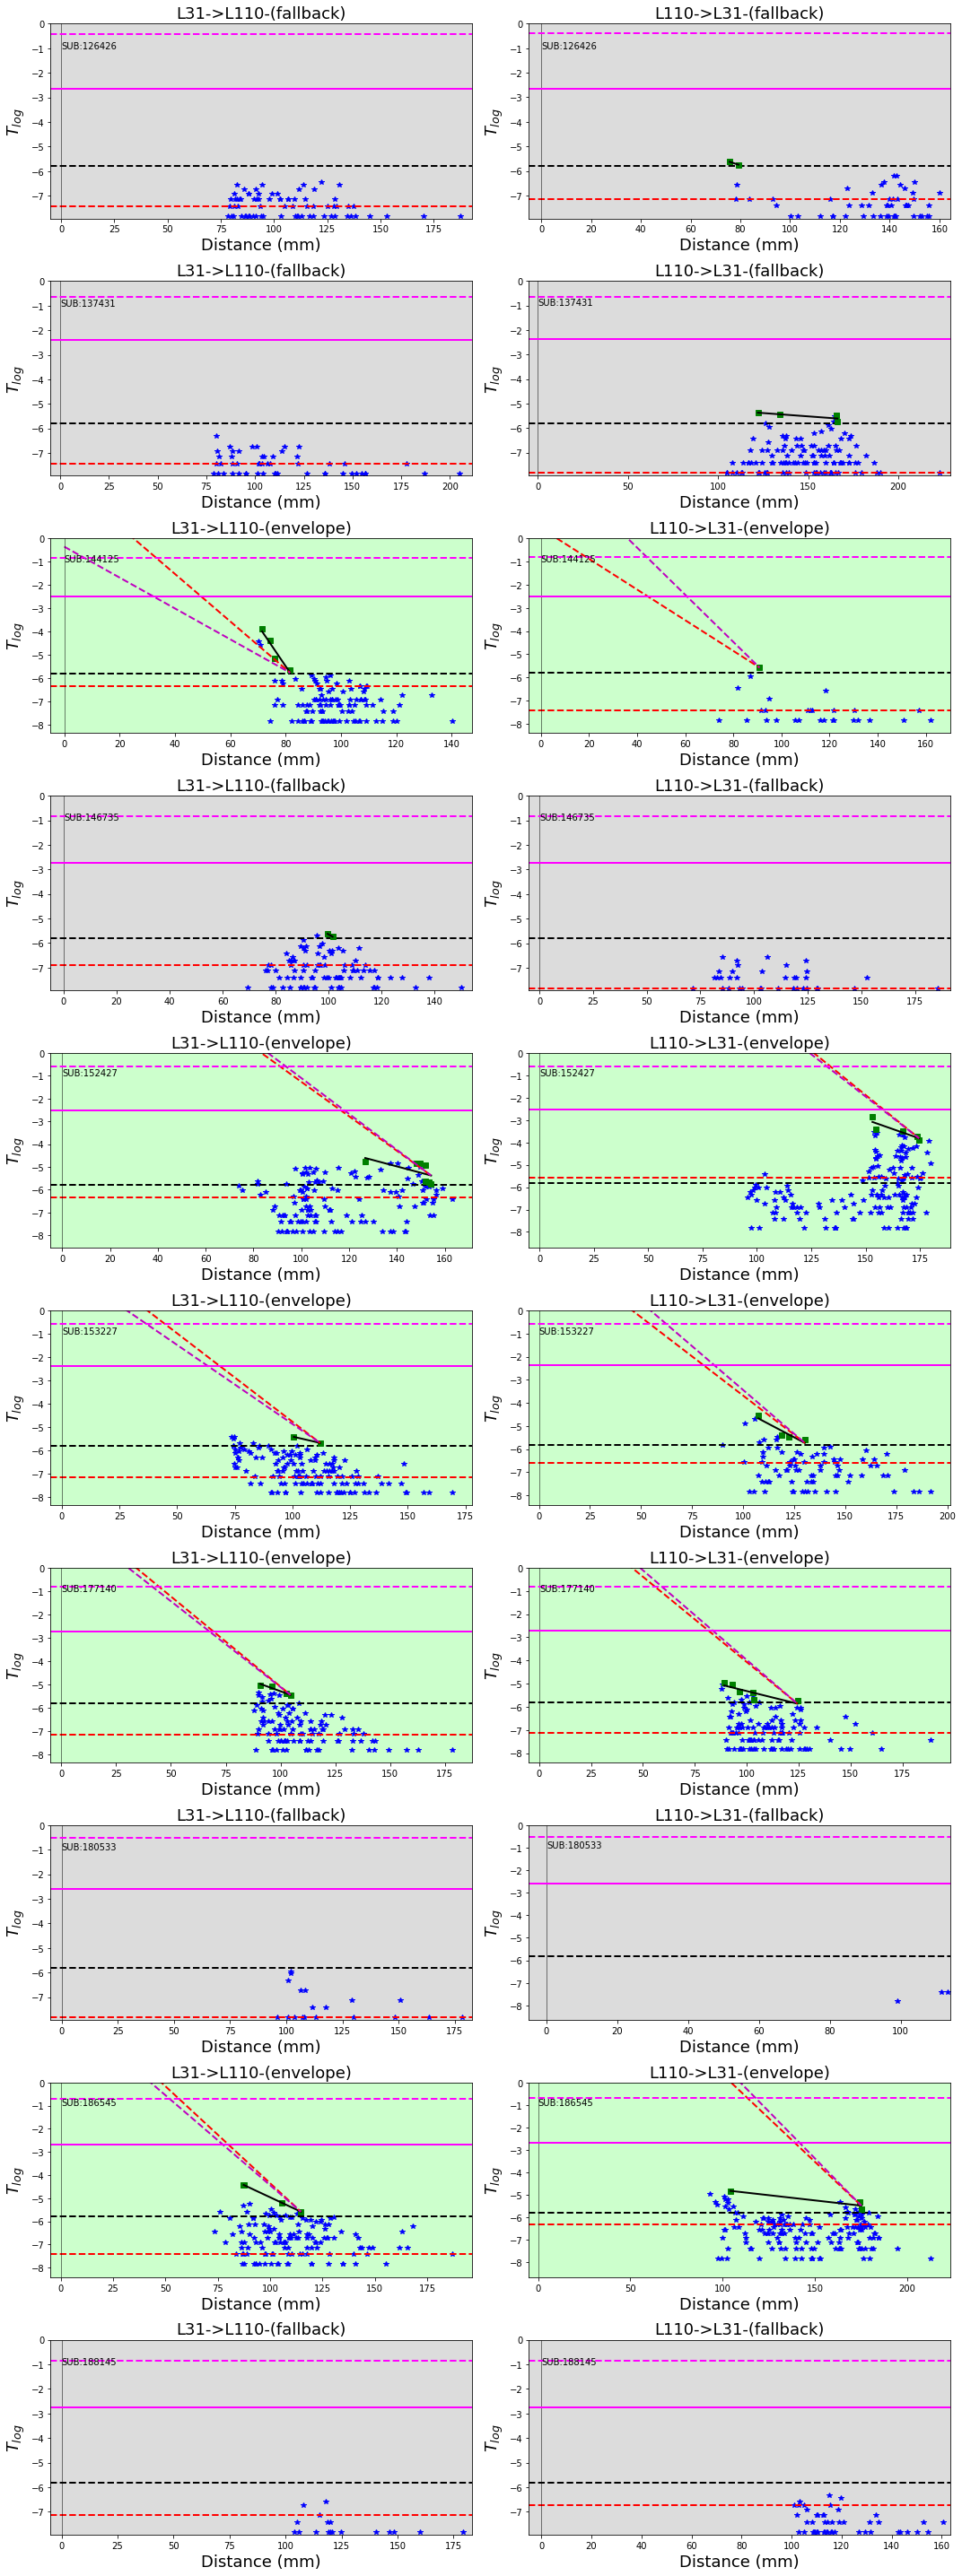

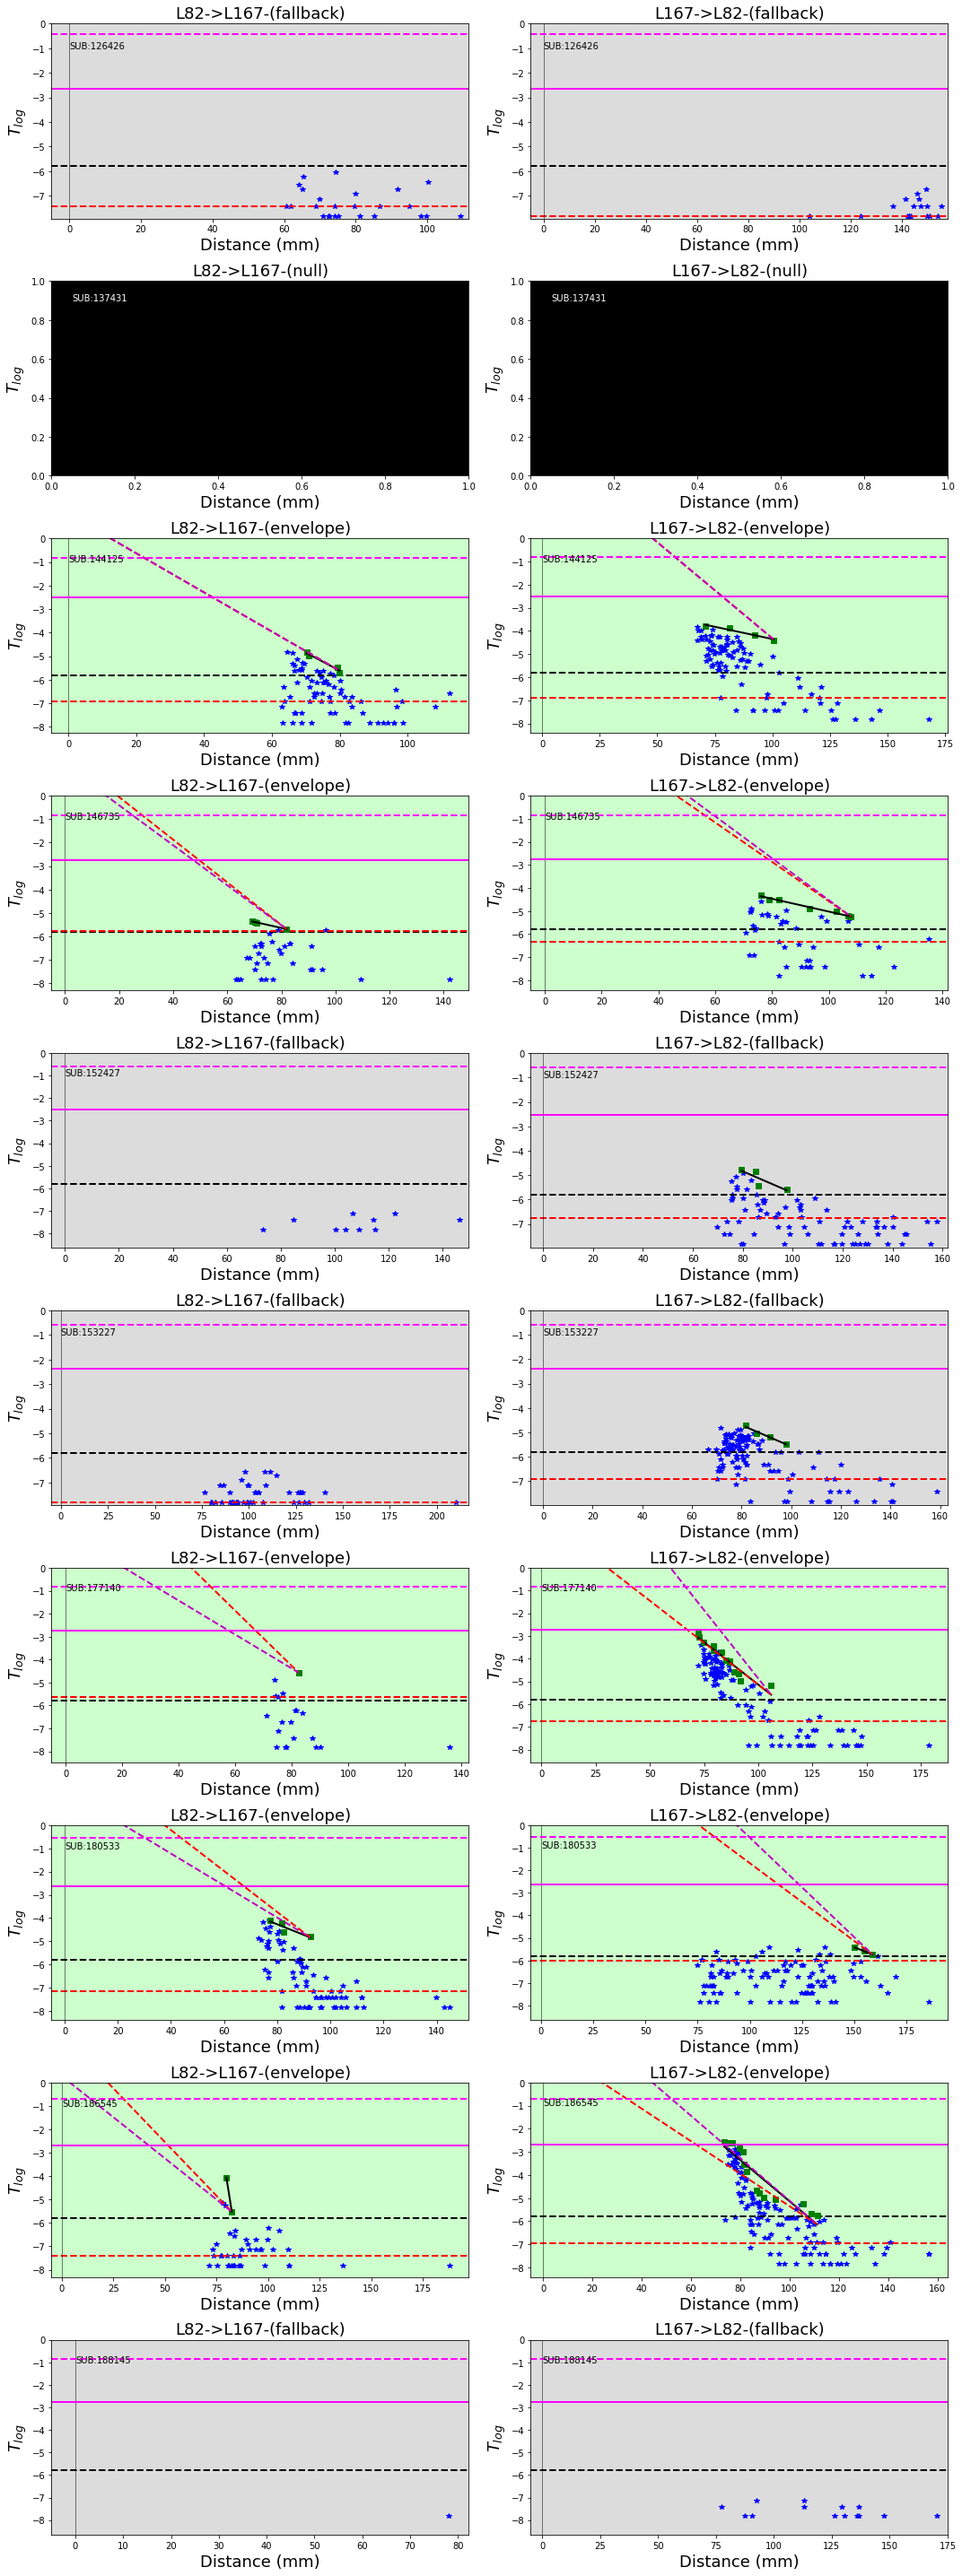

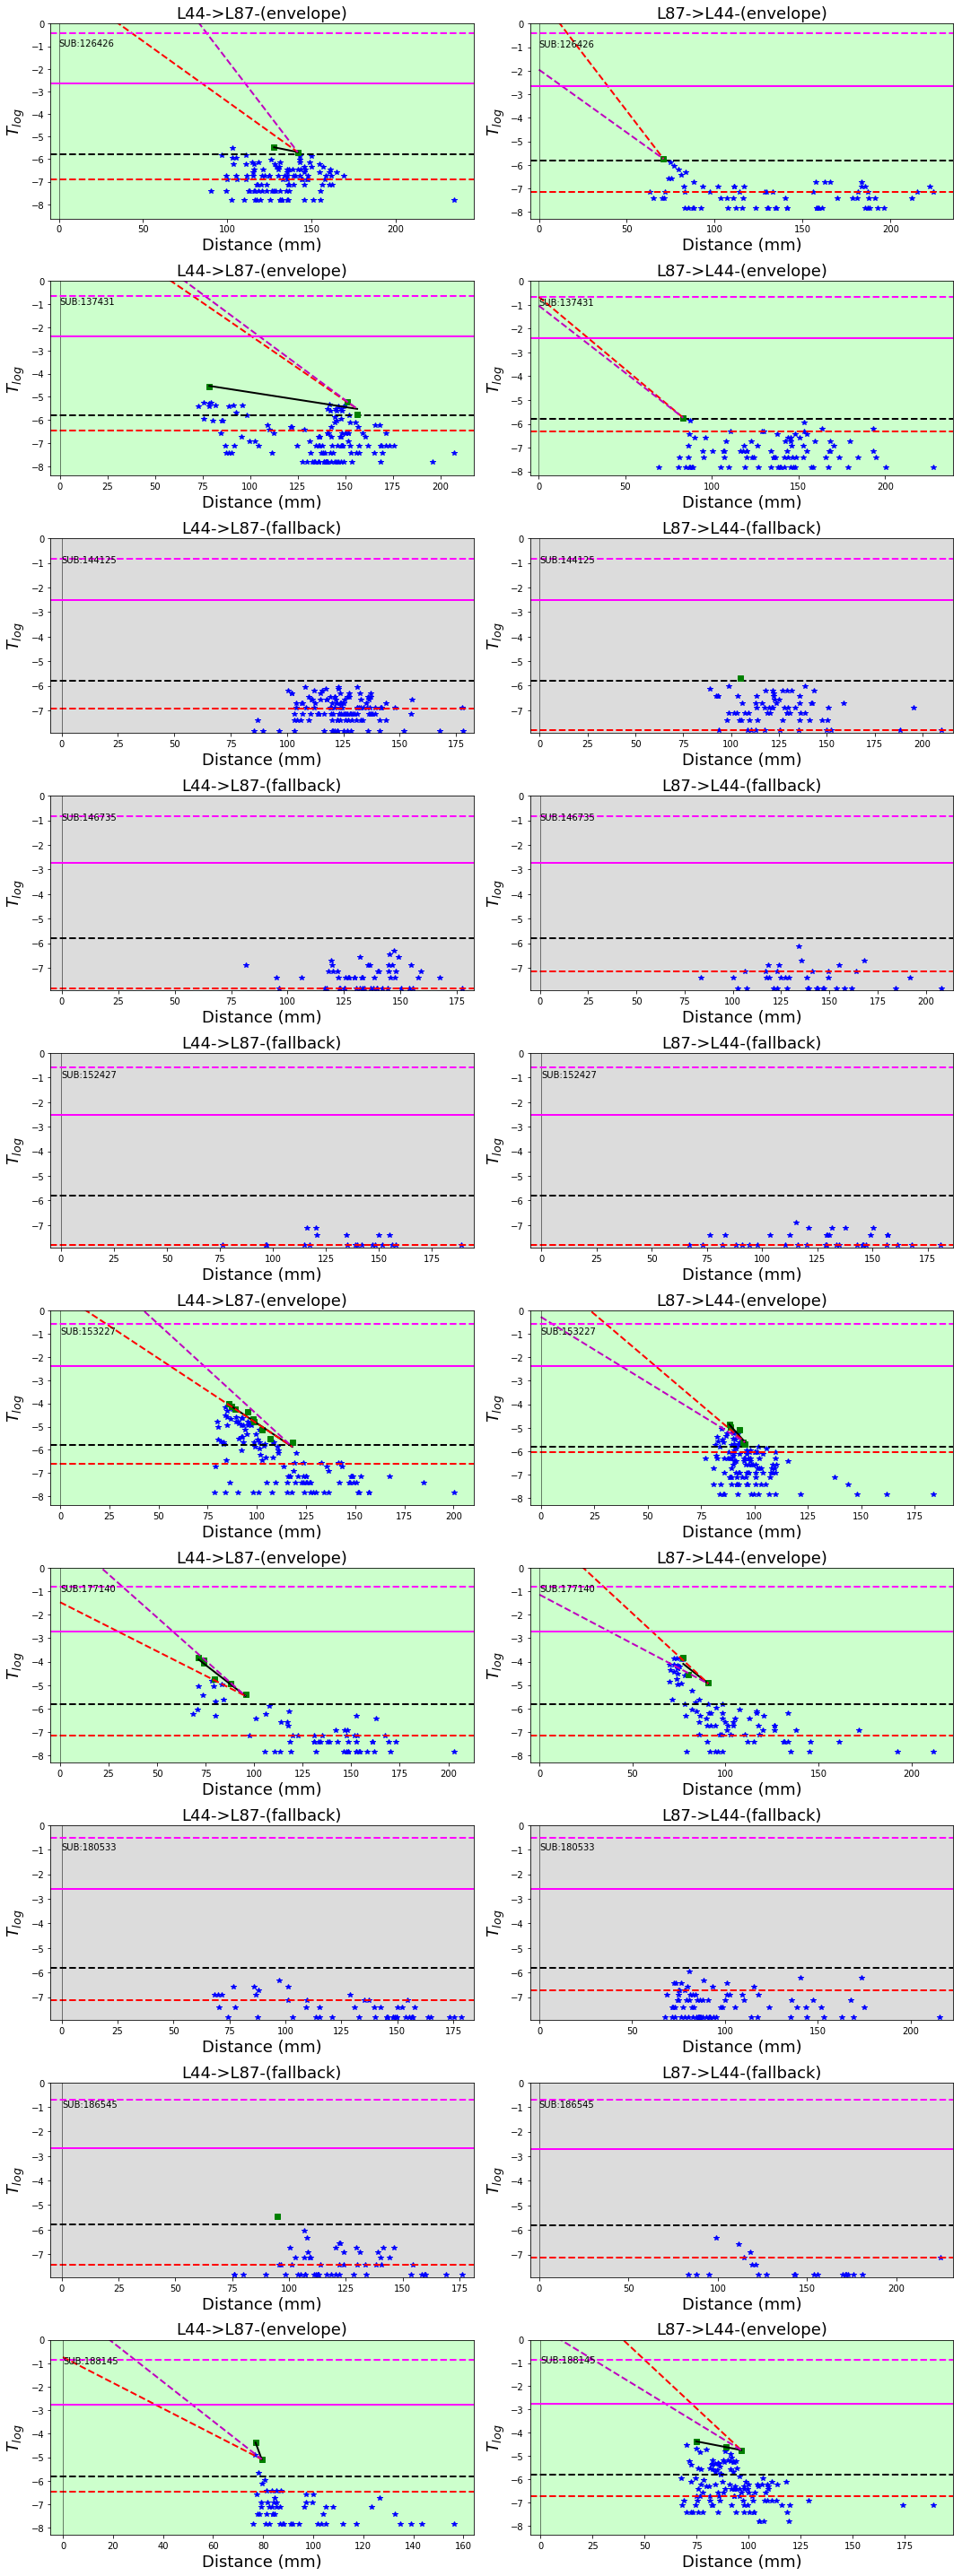

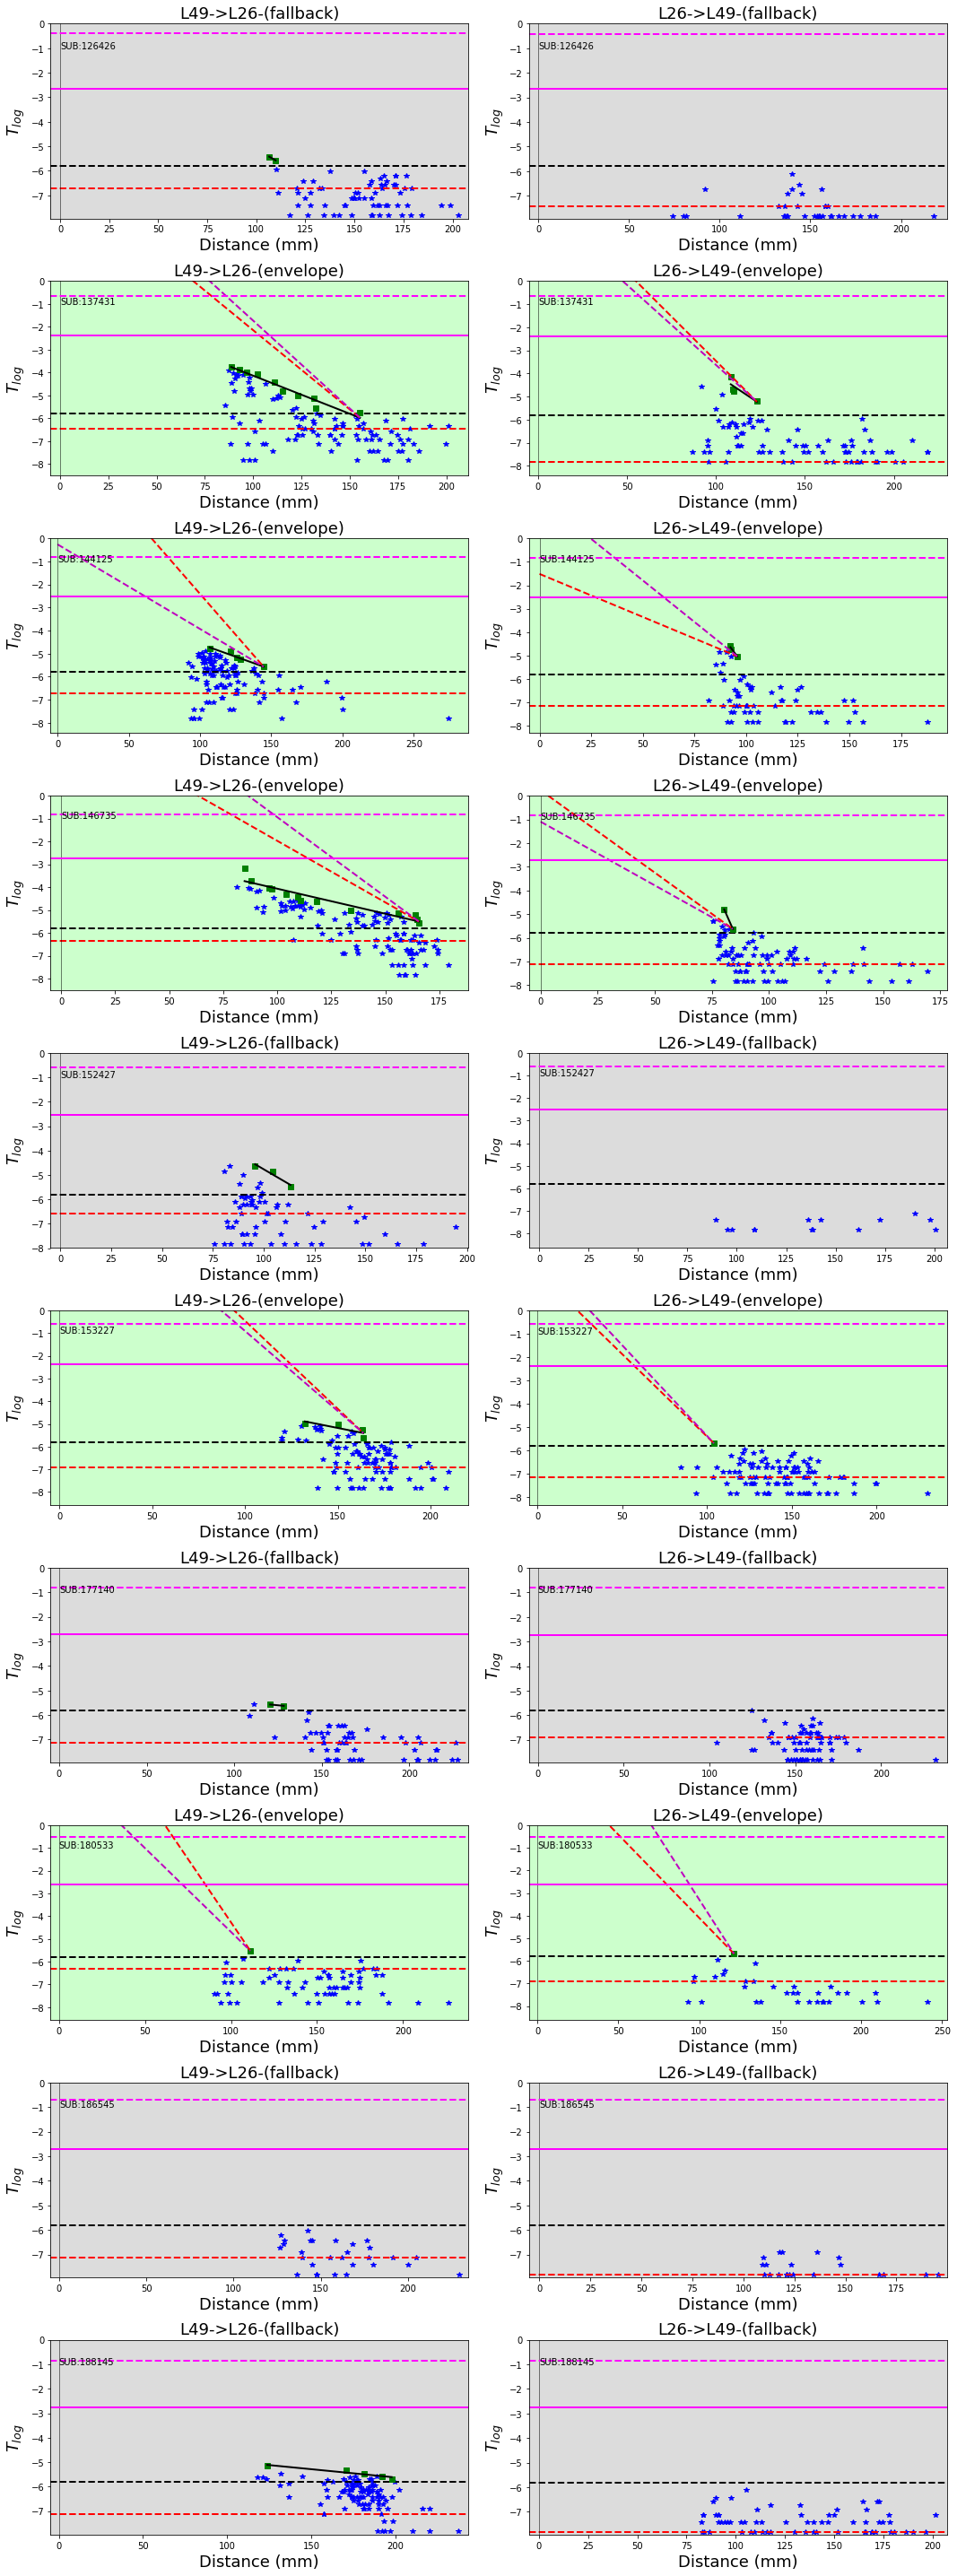

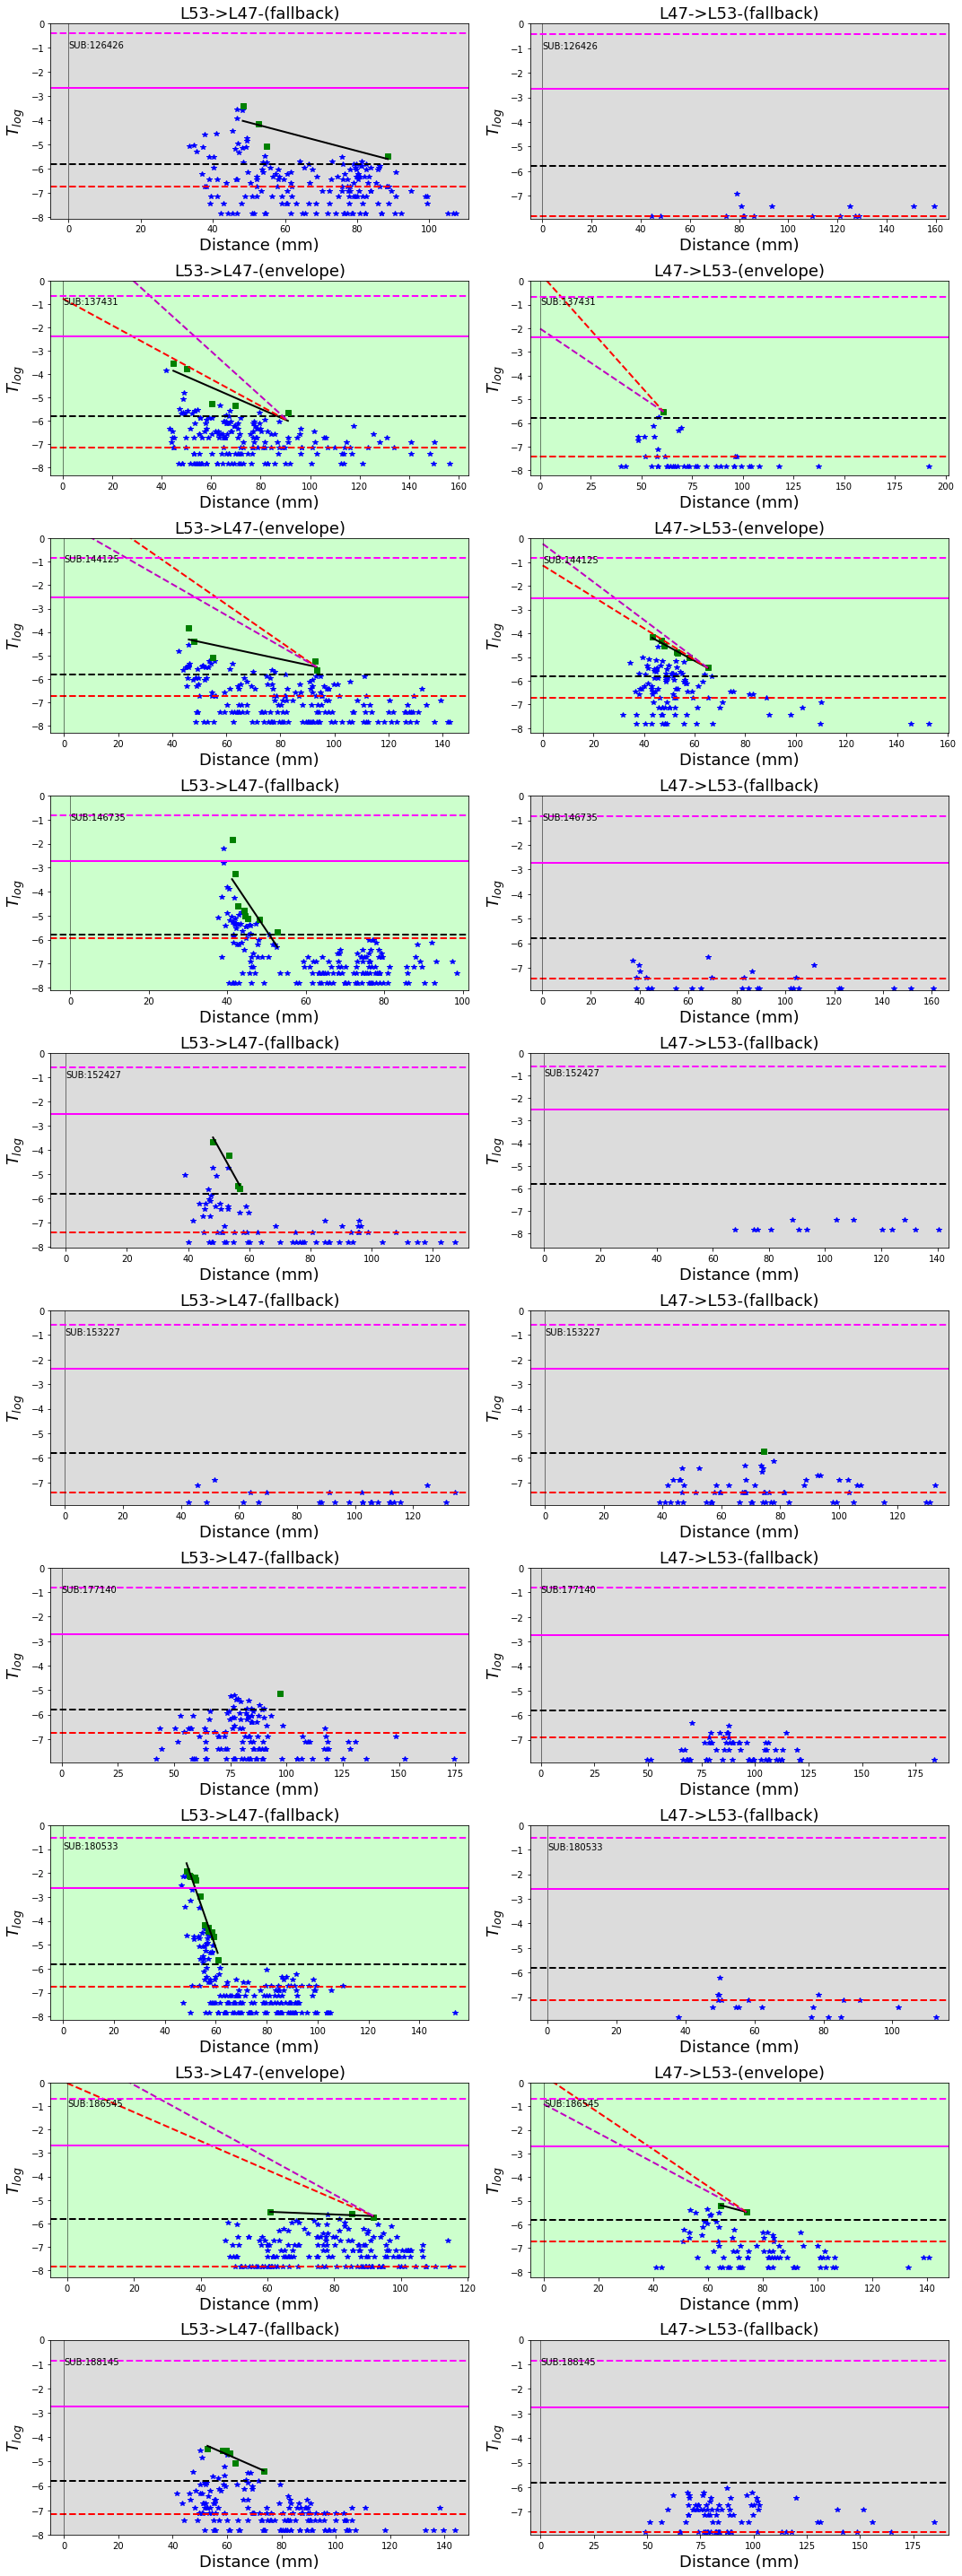

In [9]:
for c in range(10):
    print(c,C[c])
    fig, ax  = plt.subplots(10,2,figsize=(15,40))
    for i,sub in enumerate(subs):
        a = mn.ST(subs[i],C[c][0],C[c][1])
        b = mn.ST(subs[i],C[c][1],C[c][0])
        a.load_mania_results()
        b.load_mania_results()
        try:
            a.process()
            b.process()
        except:
            pass
        p = mn.PairST(a,b)
        p.plot(ax[i,:])
    plt.tight_layout()
    plt.savefig(f'{C[c][0]}-{C[c][1]}.png')

In [14]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [17]:
mn.EnsembleST(144125)

pymania.base.EnsembleST

In [22]:
sub = mn.compute_subject(144125, save=False)

Pre:   0%|          | 0/32220 [00:00<?, ?it/s]/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Pre:   0%|          | 5/32220 [00:00<13:22, 40.15it/s]

Preprocessing connections for subject144125


 27%|██▋       | 48/180 [00:00<00:00, 243.01it/s]

Find roi regressors for subject144125


100%|██████████| 180/180 [00:00<00:00, 229.00it/s]


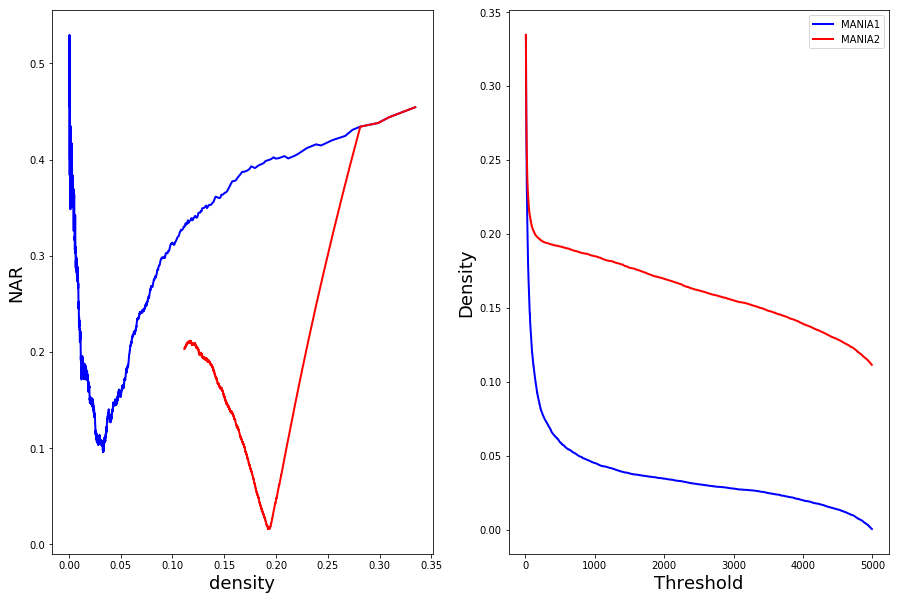

In [23]:
sub.plot_mania()

In [25]:
net,den,nar,t = mn.mania_on_mat(sub.matrix2)

In [28]:
import matplotlib.pyplot as pl

In [40]:
mn.density(net)

0.3345127250155183

In [33]:
import numpy as np

In [35]:
np.argmin(nar)

397

In [36]:
t[397]

408

In [37]:
np.log(408/5000)

-2.505926017012076

In [74]:
nn = np.zeros((180,180))
nn[sub.matrix2>4990]=1

In [75]:
print(mn.density(nn),mn.NAR(nn))


0.11145251396648044 0.20277211594076533


In [65]:
np.exp(-5.8)*5000

15.137773726879077

In [87]:
def mania_on_mat(B,nos = 5000,cut = 10, log=False):
	l = nos-2*cut
	den = [0.0]*l
	nar = [0.0]*l
	t = [0.0]*l
	n,_ = B.shape
	his = float('inf')
	C = np.zeros((n,n))
	for i in range(nos-cut,cut,-1):
		if log:
			th = np.log(i/nos)
		else:
			th = i
		t[i-cut-1] = th
		C[B>=th] = 1
		den[i-cut-1] = mn.density(C)
		tmp = mn.NAR(C)
		nar[i-cut-1] = tmp
	ind = np.argmin(nar)
	t = t[ind]
	net = np.zeros((n,n))
	net[B>=t] = 1
	return (net,den,nar,t)

In [88]:
net,den,nar,t = mania_on_mat(sub.matrix2)

In [89]:
np.argmin(nar)

397

In [90]:
den[397]

0.19252017380509

In [91]:
mn.density(net)

0.19252017380509